# Heart Disease Prediction
using Random Forest Algorithm

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv('cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [119]:
df['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


Visualization

In [120]:
df.isnull().values.any()
# if false, there's no null values

False

In [7]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


<Axes: xlabel='cardio', ylabel='count'>

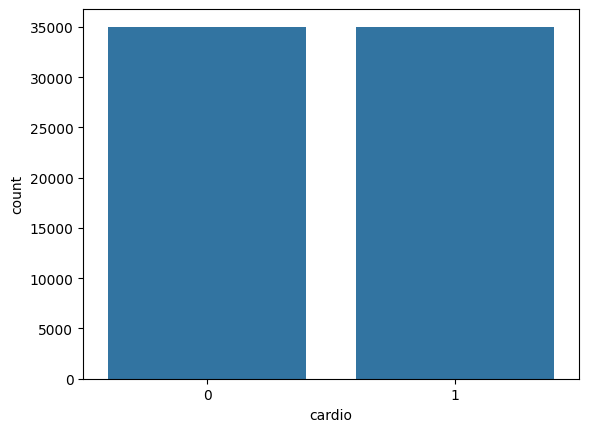

In [8]:
sns.countplot(x='cardio',data=df)

In [9]:
df['gender'].value_counts()

,count
gender,
1,45530
2,24470


<Axes: xlabel='gender', ylabel='count'>

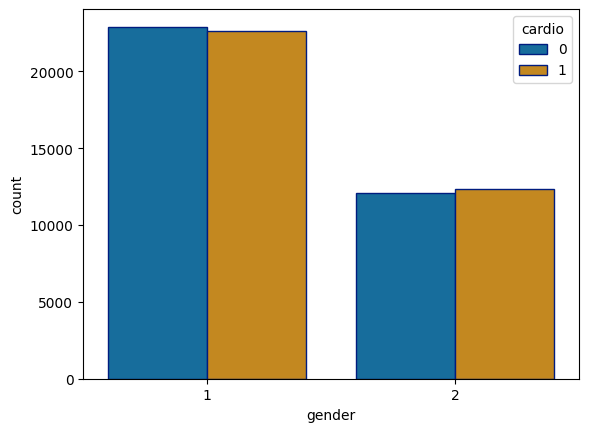

In [10]:
sns.countplot(x='gender', hue='cardio', palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1)[0], data=df)

<Axes: xlabel='age', ylabel='count'>

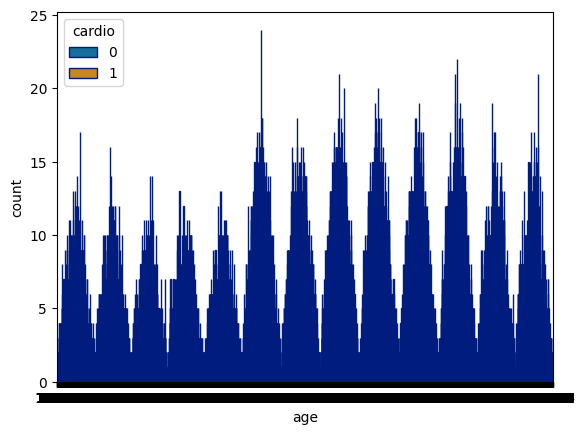

In [11]:
sns.countplot(x='age', hue='cardio', palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1)[0], data=df)

In [121]:
# as ages are in days , we need to convert this into years
df['yr']=df['age']/365
df['yr']

,yr
0,50.391781
1,55.419178
2,51.663014
3,48.282192
4,47.873973
...,...
69995,52.712329
69996,61.920548
69997,52.235616
69998,61.454795


In [122]:
# as there are fractional values, we need to round them otherwise it will give the same ununderstandable plot
df['yr']=round(df['yr'])
df['yr']

,yr
0,50.0
1,55.0
2,52.0
3,48.0
4,48.0
...,...
69995,53.0
69996,62.0
69997,52.0
69998,61.0


<Axes: xlabel='yr', ylabel='count'>

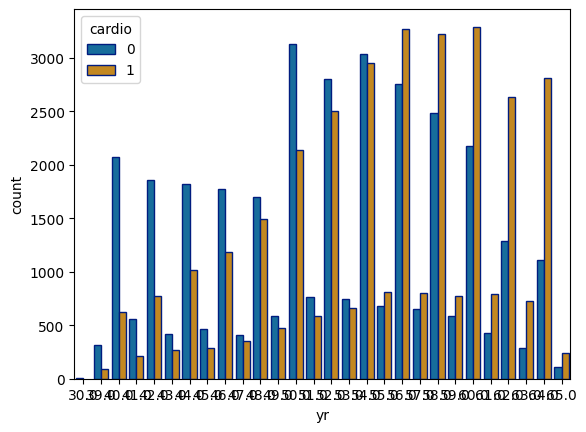

In [14]:
sns.countplot(x='yr', hue='cardio', palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1)[0], data=df)

In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [16]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


# Classify
Class attribute: Cardio

Normal attributes/features: Other Columns

In [123]:
df = df.drop(['yr'],axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [124]:
x = df.drop('cardio', axis=1)
x = x.drop('id', axis=1)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [125]:
y = df['cardio']
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [101]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


#Feature Selection Technique
Feature selection is like picking the best ingredients for a recipe. You don’t use everything in your kitchen—just the ingredients that make the dish taste better! In machine learning, features (like age, income, or location) are the inputs your model uses to make predictions. Feature selection helps you choose the most useful features and ignore the rest.

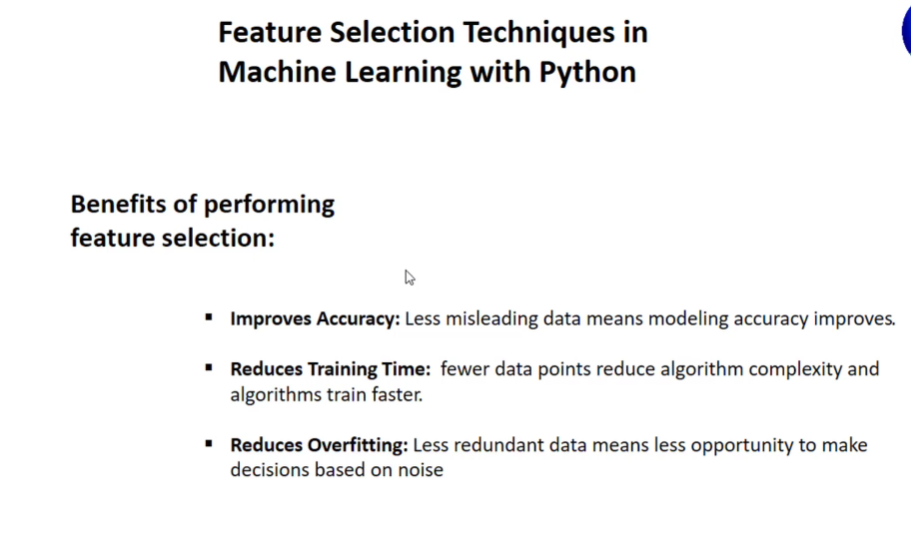

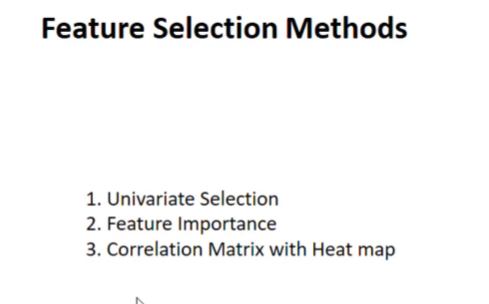

In [102]:
from IPython.display import Image, display


image_files = [
    '/content/Screenshot_20250309_113018.png',
    '/content/Screenshot_20250309_113032.png'
]


for image_file in image_files:
    display(Image(filename=image_file))


In [103]:
# Import the SelectKBest class for selecting top features
from sklearn.feature_selection import SelectKBest

# Import the f_classif function (ANOVA F-value) to score features for classification tasks
from sklearn.feature_selection import f_classif

# Create a SelectKBest object to select the best features using the f_classif scoring method
# By default, it selects the top 10 features (you can change this with the "k" parameter)
FIT_Feature = SelectKBest(score_func=f_classif)

# Fit the selector to your data (X = features, y = target/labels)
# This calculates the F-scores for all features
FIT_Feature.fit(x, y)

# Convert the F-scores of all features to a DataFrame for easy analysis
# Higher scores mean the feature is more important for predicting the target
pd.DataFrame(FIT_Feature.scores_)

,0
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [104]:
SCORE_col = pd.DataFrame(FIT_Feature.scores_,columns=['score_values'])
SCORE_col

,score_values
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [105]:
NAME_col = pd.DataFrame(x.columns)
NAME_col

,0
0,age
1,gender
2,height
3,weight
4,ap_hi
5,ap_lo
6,cholesterol
7,gluc
8,smoke
9,alco


In [106]:
# Concatanation
top_features = pd.concat([NAME_col,SCORE_col],axis=1)
top_features

,0,score_values
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [108]:
top_features.nlargest(10,'score_values')

,0,score_values
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541
2,height,8.197397
1,gender,4.603641


alco is not in top 10 features, so let's drop it

In [109]:
x=x.drop(['alco'],axis=1)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,18393,2,168,62.0,110,80,1,1,0,1
1,20228,1,156,85.0,140,90,3,1,0,1
2,18857,1,165,64.0,130,70,3,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,1
4,17474,1,156,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,1
69996,22601,1,158,126.0,140,90,2,2,0,1
69997,19066,2,183,105.0,180,90,3,1,0,0
69998,22431,1,163,72.0,135,80,1,2,0,0


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)


In [127]:
x_train
# 70%

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [128]:
x_test
# 30%

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
6670,16099,1,153,93.0,140,90,1,1,0,0,1
49567,14437,1,157,89.0,120,80,1,1,0,0,1
50796,19839,1,165,66.0,150,90,1,1,0,0,1
22310,18050,2,176,88.0,160,100,2,2,1,1,1
54037,16819,2,165,78.0,140,90,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15691,18263,1,170,70.0,120,80,1,1,0,0,1
25200,21081,1,165,60.0,120,70,3,1,0,0,1
7366,14716,1,170,68.0,100,60,1,1,0,0,1
56399,21998,1,165,66.0,110,80,1,1,0,0,1


In [129]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
rclf.score(x_test,y_test)

0.7179047619047619

In [115]:
# Checking with decision tree
from sklearn.tree import DecisionTreeClassifier
dclf= DecisionTreeClassifier()
dclf.fit(x_train,y_train)
dclf.score(x_test,y_test)

0.632095238095238

# Saving Machine Learning Models

In [116]:
import pickle as pk

with open('rclf','wb') as files:
    pk.dump(rclf,files)

#Feature Importance

In [136]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

model.feature_importances_

array([0.28937711, 0.00505901, 0.16882342, 0.18055577, 0.17858012,
       0.10841117, 0.04534207, 0.01081941, 0.0040325 , 0.00411903,
       0.00488039])

In [138]:
top = pd.Series(model.feature_importances_,index=x.columns)
top

,0
age,0.289377
gender,0.005059
height,0.168823
weight,0.180556
ap_hi,0.178580
ap_lo,0.108411
cholesterol,0.045342
gluc,0.010819
smoke,0.004032
alco,0.004119


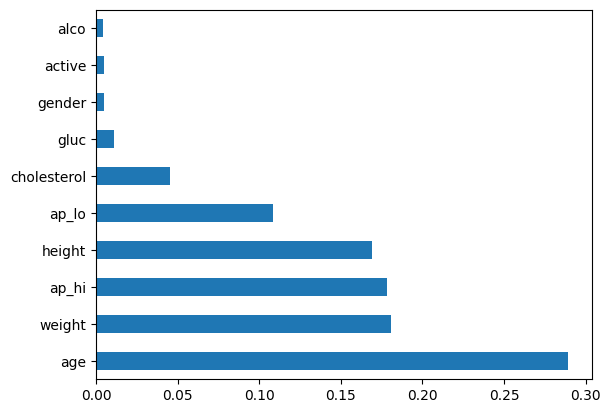

In [142]:
top.nlargest(10).plot(kind='barh')
plt.show()